**MACHINE LEARNING**

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

**Objective is to predict the price of houses based on 3  features: Income, age of the house, and population**

**Implementation of the linear regression algorithm from scratch:**

In [2]:
#Reading the .csv file

housing = pd.read_csv('USA_Housing.csv')
housing.head()

,Area Income,Area House Age,Area Population,Price,Address
0,79545,5.68,23087,1059034,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6.00,40173,1505891,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,5.87,36882,1058988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7.19,34310,1260617,USS Barnett\nFPO AP 44820
4,59982,5.04,26354,630943,USNS Raymond\nFPO AE 09386


In [3]:
#Getting the information (i.e, the number of rows and the data types present in each column) and the basic statistical measures 
#about the dataframe 'housing' using the info() and describe() functions available in the Pandas library.

housing.info()

housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Income      5000 non-null   int64  
 1   Area House Age   5000 non-null   float64
 2   Area Population  5000 non-null   int64  
 3   Price            5000 non-null   int64  
 4   Address          5000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 195.4+ KB


,Area Income,Area House Age,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.103800,5.977278,36163.512200,1.232073e+06
std,10657.990158,0.991437,9925.651196,3.531176e+05
min,17797.000000,2.640000,173.000000,1.593900e+04
25%,61480.500000,5.320000,29404.000000,9.975775e+05
50%,68804.500000,5.970000,36199.000000,1.232669e+06
75%,75783.000000,6.650000,42861.000000,1.471210e+06
max,107702.000000,9.520000,69622.000000,2.469066e+06


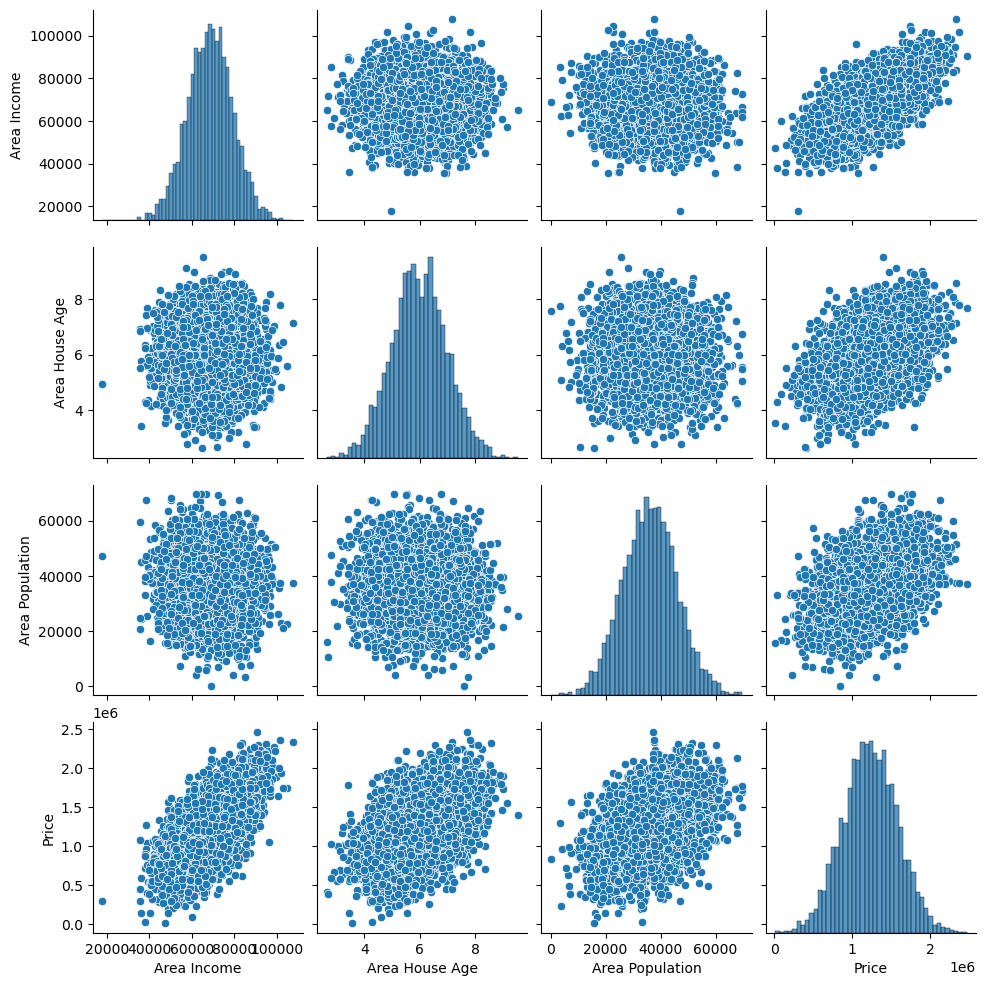

In [4]:
#Scatter plot between all the columns in the dataset using the pairplot() function in the Seaborn library.

sns.pairplot(housing)

In [5]:
#Computing the correlation coefficient between all the columns in the dataset and displaying them as a heat map using the 
#heatmap() function in the Seaborn library

corr = housing.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

In [6]:
#Copying the original dataframe and picking the columns of interest

data = housing.copy()
data = data.iloc[:, 0:4]
data.head()

,Area Income,Area House Age,Area Population,Price
0,79545,5.68,23087,1059034
1,79249,6.00,40173,1505891
2,61287,5.87,36882,1058988
3,63345,7.19,34310,1260617
4,59982,5.04,26354,630943


In [7]:
#Converting the 3 feature columns into standard units and appending the converted values as new columns to the dataframe 'data'

data['Area Income (standard units)'] = (data['Area Income'] - np.mean(data['Area Income']))/(np.std(data['Area Income']))
data['Area House Age (standard units)'] = (data['Area House Age'] - np.mean(data['Area House Age']))/(np.std(data['Area House Age']))
data['Area Population (standard units)'] = (data['Area Population'] - np.mean(data['Area Population']))/(np.std(data['Area Population']))
data.head()   

,Area Income,Area House Age,Area Population,Price,Area Income (standard units),Area House Age (standard units),Area Population (standard units)
0,79545,5.68,23087,1059034,1.028617,-0.299875,-1.317578
1,79249,6.00,40173,1505891,1.000842,0.022921,0.403993
2,61287,5.87,36882,1058988,-0.684635,-0.108215,0.072394
3,63345,7.19,34310,1260617,-0.491521,1.223318,-0.186758
4,59982,5.04,26354,630943,-0.807091,-0.945467,-0.988398


In [8]:
#Randomly shuffling (without replacement) all the rows in the dataframe 'data'. After shuffling, picking the first 66.66% of 
#the rows as the training set and the rest 33.33% of the rows as the test_set. 

random = data.sample(5000, replace = False)
training_set = random.iloc[0:3333, :]
test_set = random.iloc[3333:, :]

print(len(training_set))
print(len(test_set))

3333
1667


In [9]:
#Separating out the features and the response variables in the training set and the test set as 'x_train, y_train, x_test, and 
#y_test'

x_train = training_set.iloc[:, 4:7].values
y_train = training_set.iloc[:, 3].values
y_train = np.reshape(y_train, (len(y_train), 1))

x_test = test_set.iloc[:, 4:7].values
y_test = test_set.iloc[:, 3].values
y_test = np.reshape(y_test, (len(y_test), 1))

print("x_train_Shape:", np.shape(x_train))
print("y_train_Shape:", np.shape(y_train))

print("x_test_Shape:", np.shape(x_test))
print("y_test_Shape:", np.shape(y_test))

x_train_Shape: (3333, 3)
y_train_Shape: (3333, 1)
x_test_Shape: (1667, 3)
y_test_Shape: (1667, 1)


In [10]:
#Transposing and stacking a row of ones vertically to the 'x_train and x_test' for the purposes of vectorization

x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
print("x_train_Aug:", np.shape(x_train_Aug))

x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
print("x_test_Aug:", np.shape(x_test_Aug))

x_train_Aug: (4, 3333)
x_test_Aug: (4, 1667)


In [11]:
#Defining theta as an array of zeros

theta = np.zeros((4,1))
print("theta:", np.shape(theta))

theta: (4, 1)


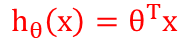

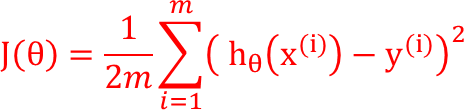

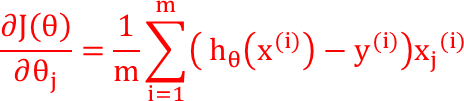

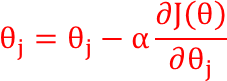

In [12]:
#Implementing the gradient descent algorithm

no_of_iter = np.arange(1, 10001)
alpha = 0.003
m_train = len(x_train)
m_test = len(x_test)

costfunc = []

#Iteration loop
for i in no_of_iter:
    z = np.transpose(theta)@x_train_Aug #Hypothesis function
    cf = (1/(2*m_train))*(np.sum((np.transpose(z)-y_train)**2)) #Cost function
    costfunc.append(cf) #Appending cost function
    delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(z)-y_train)) #Derivative of cost function
    theta = theta - (alpha*delthetaj) #Updating theta values
    
print(len(costfunc))
print(theta)

10000
[[1230313.83953124]
 [ 226895.60115175]
 [ 164305.35315766]
 [ 151843.8235642 ]]


In [13]:
#Testing the model on the training set

h_theta = np.transpose(theta)@x_train_Aug
y_train_pred = np.transpose(h_theta)

plt.scatter(y_train, y_train_pred, color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

In [14]:
#Testing the model on the test set

h_theta = np.transpose(theta)@x_test_Aug
y_test_pred = np.transpose(h_theta)

plt.scatter(y_test, y_test_pred, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

In [15]:
#Plotting cost function vs. number of iterations

plt.plot(no_of_iter,costfunc,color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Cost function vs. number of iterations")

Text(0.5, 1.0, 'Cost function vs. number of iterations')

In [16]:
#Computing the MSE and the RMSE values for the predictions made on the training set

MSE_train = (1/m_train)*(np.sum((y_train-y_train_pred)**2))
RMSE_train = np.sqrt(MSE_train)

print(MSE_train)
print(RMSE_train)

24719304840.48098
157223.74133851725


In [17]:
#Computing the MSE and the RMSE values for the predictions made on the test set

MSE_test = (1/m_test)*(np.sum((y_test-y_test_pred)**2))
RMSE_test = np.sqrt(MSE_test)

print(MSE_test)
print(RMSE_test)

26106758276.890793
161575.85920208128


**Implementation of the linear regression algorithm using the Scikit-Learn library:**

In [18]:
#Print the first 5 rows of the dataframe 'housing'

housing.head()

,Area Income,Area House Age,Area Population,Price,Address
0,79545,5.68,23087,1059034,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79249,6.00,40173,1505891,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287,5.87,36882,1058988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345,7.19,34310,1260617,USS Barnett\nFPO AP 44820
4,59982,5.04,26354,630943,USNS Raymond\nFPO AE 09386


In [19]:
#Assigning the 3 feature columns to a variable named 'x' and assigning the response variable column to a variable named 'y'

x = housing.iloc[:, 0:3]
y = housing.iloc[:, 3]

print(x.head())
print(y.head())

   Area Income  Area House Age  Area Population
0        79545            5.68            23087
1        79249            6.00            40173
2        61287            5.87            36882
3        63345            7.19            34310
4        59982            5.04            26354
0    1059034
1    1505891
2    1058988
3    1260617
4     630943
Name: Price, dtype: int64


In [20]:
#Feature scaling the 3 feature columns

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x.astype(float))
x

array([[ 1.02861725, -0.29987546, -1.31757804],
       [ 1.00084188,  0.02292053,  0.40399252],
       [-0.68463504, -0.10821534,  0.07239421],
       ...,
       [-0.48720472,  1.2838424 , -0.29195082],
       [-0.05462212, -0.45118609,  0.65115467],
       [-0.28827302,  0.01283316,  1.04159631]])

In [21]:
#Splitting the dataset into training set and the test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333333)

In [22]:
#Training the model based on 'x_train and y_train' and getting the coefficients and the intercept

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

print(lm.coef_)
print(lm.intercept_)

[228905.55427112 161888.78742713 150887.14119184]
1231405.863400731


In [23]:
#Testing the model on the training set

y_train_pred = lm.predict(x_train)

plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

In [24]:
#Testing the model on the test set

y_test_pred = lm.predict(x_test)

plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

In [25]:
#Computing the MSE and the RMSE values for the predictions made on the training set

from sklearn import metrics

MSE_train = metrics.mean_squared_error(y_train, y_train_pred)
RMSE_train = np.sqrt(MSE_train)   
                                       
print(MSE_train)
print(RMSE_train)

25039820318.244984
158239.75580821963


In [26]:
#Computing the MSE and the RMSE values for the predictions made on the test set

MSE_test = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_test = np.sqrt(MSE_test)  

print(MSE_test)
print(RMSE_test)

25446596974.824966
159519.89523198968
